<a href="https://colab.research.google.com/github/prasad4fun/Exploratory-Data-Analysis/blob/master/EDA_haberman.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [0]:
haberman = pd.read_csv("haberman.csv")

In [4]:
haberman.head()

,30,64,1,1.1
0,30,62,3,1
1,30,65,0,1
2,31,59,2,1
3,31,65,4,1
4,33,58,10,1


**Columns Description**:

1. Age of patient at time of operation (numerical)
2. Patient's year of operation (year - 1900, numerical)
3. Number of positive axillary nodes detected (numerical)
4. Survival status (class attribute) 1 = the patient survived 5 years or longer 2 = the patient died within 5 years

In [14]:
haberman.shape, haberman.columns

((305, 4), Index(['30', '64', '1', '1.1'], dtype='object'))

In [0]:
haberman.columns = ['age', 'op_year', 'axil_nodes_det', 'status']

In [28]:
haberman["status"].value_counts()

1    224
2     81
Name: status, dtype: int64

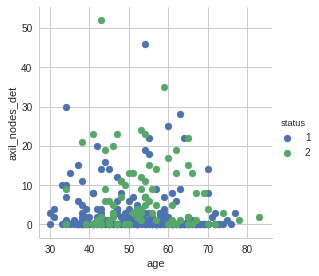

In [30]:
sns.set_style("whitegrid");
sns.FacetGrid(haberman, hue="status", size=4) \
   .map(plt.scatter, "age", "axil_nodes_det") \
   .add_legend();
plt.show();

we cannot distinguish patients survival status using **age** and **number of axillary nodes**

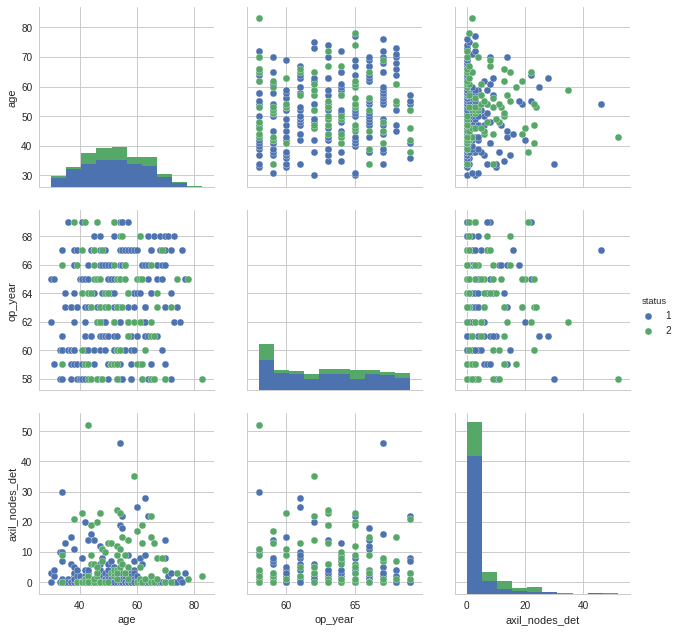

In [32]:
plt.close();
sns.set_style("whitegrid");
sns.pairplot(haberman, hue="status", size=3, vars=['age', 'op_year', 'axil_nodes_det']);
plt.show();

The Data is highly overlapping, None of the combination of features help us to make survival status linearly seperable 

# Lets try if we can make use of one single feature to classify the survival status

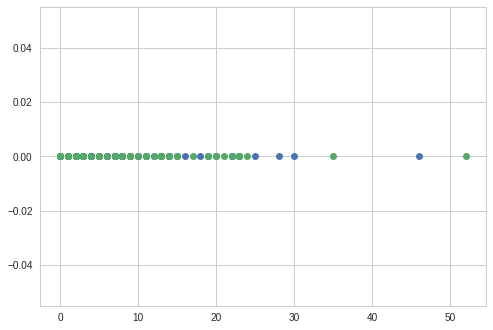

In [33]:
import numpy as np

haberman_1 = haberman.loc[haberman["status"] == 1]
haberman_2 = haberman.loc[haberman["status"] == 2]

plt.plot( haberman_1["axil_nodes_det"], np.zeros_like( haberman_1["axil_nodes_det"] ), 'o')
plt.plot( haberman_2["axil_nodes_det"], np.zeros_like( haberman_2["axil_nodes_det"] ), 'o')

plt.show()
plt.add

Hard to Decode distributions of the values, lets try histogram charts which will help in understanding the distribution of data much better

/usr/local/lib/python3.6/dist-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


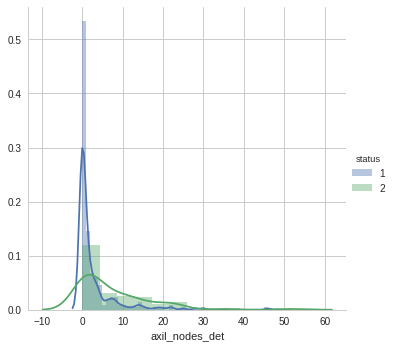

In [35]:
sns.FacetGrid(haberman, hue="status", size=5) \
   .map(sns.distplot, "axil_nodes_det") \
   .add_legend();
plt.show();

/usr/local/lib/python3.6/dist-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


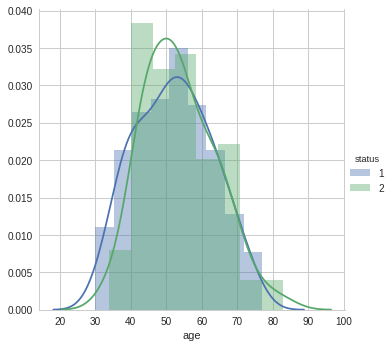

In [36]:
sns.FacetGrid(haberman, hue="status", size=5) \
   .map(sns.distplot, "age") \
   .add_legend();
plt.show();

/usr/local/lib/python3.6/dist-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


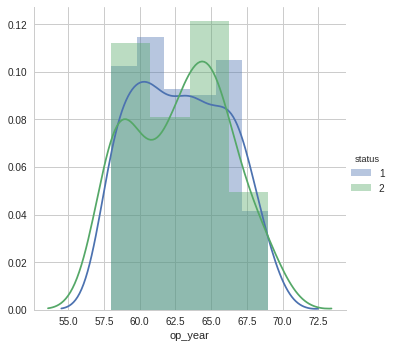

In [37]:
sns.FacetGrid(haberman, hue="status", size=5) \
   .map(sns.distplot, "op_year") \
   .add_legend();
plt.show();